- CARICO DI CONDUZIONE GAMBE DI RAME (RRR=500 PER ECCESSO)

L'integrale di conduzione tra 4.2 K e 4.6 K è: 1386.3263 W/m


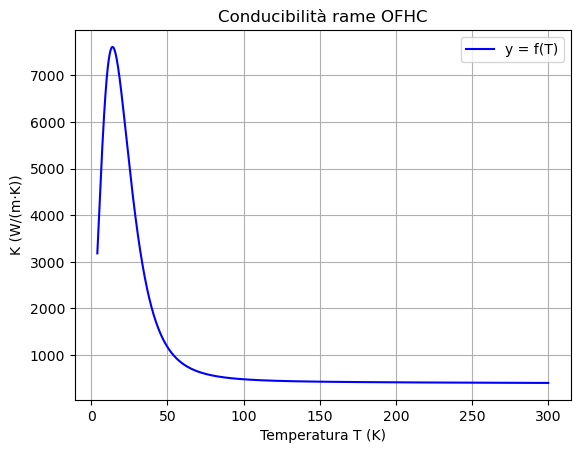

Rapporto A/l = 5.714285714285715e-05
Carico conduzione gambe di rame :   Q = 6.3375e-01 W


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definire i coefficienti
a = 2.8075
b = -0.54074
c = -1.2777
d = 0.15362
e = 0.36444
f = -0.02105
g = -0.051727
h = 0.0012226
i = 0.0030964

# Funzione conducibilità vs Temperatura
def y(T):
    logT = np.log10(T)
    return 10**( (a + c * T**0.5 + e * T + g * T**1.5 + i * T**2) / (1 + b * T**0.5 + d * T + f * T**1.5 + h * T**2) )

 # Funzione per l'integrazione
def integrand(T):
    return y(T)

    

#--------INTEGRALE DI CONDUCIBILITà----------------
# estremi per l'integrazione
T_min = 4.2
T_max = 4.6

# Controllo se gli estremi sono validi
if T_min < 4 or T_max > 300:
    print("Errore: Gli estremi dell'integrazione devono essere compresi tra 4 K e 300 K.")
else:
# Calcolo dell'integrale solo se gli estremi sono validi
    integral_value, error = quad(integrand, T_min, T_max)
    print(f"L'integrale di conduzione tra {T_min} K e {T_max} K è: {integral_value:.4f} W/m")

# Intervallo di temperatura
T_range = np.linspace(4, 300, 1000)

# Valori di y calcolati
y_values = y(T_range)

# Plot della funzione
plt.plot(T_range, y_values, label='y = f(T)', color='blue')
plt.title('Conducibilità rame OFHC')
plt.xlabel('Temperatura T (K)')
plt.ylabel('K (W/(m·K))')
plt.grid(True)
plt.legend()[]
plt.show()
#plt.savefig("Carico_conduzione_g10_nist.png")


#--------CARICO CONDUZIONE DA PARAMETRI GEOMETRICI
    # Caratteristiche geometriche gambe di rame 
l = 175e-3 # lunghezza
A = 0.1e-4 #1cm^2
n = 8 # numero di gambe

# Calcolo di Q
Q = A/l * integral_value * n        

# Output del risultato
print(f"Rapporto A/l = {A/l}")
print(f"Carico conduzione gambe di rame :   Q = {Q:.4e} W")



OSS: è per eccesso: considero rame OFHC con RRR=500 (conducibilità massima)